In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd 
df=pd.read_csv('gdrive/My Drive/Python Exercises/TravelPonyFacebook.csv')
df.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857


Removed rows that have 0 amount spent.

In [0]:
df1 = df.rename(columns={"Amount Spent (USD)": "Amount_Spent_USD"})
list(df1.columns.values)
# Selecting the rows where amount spent != 0
mask = df1['Amount_Spent_USD'] != 0
df2 = df1.loc[mask]
df2.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount_Spent_USD,Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857


Question 1

Created scatter plots for spend and: reach, frequency, impressions and clicks

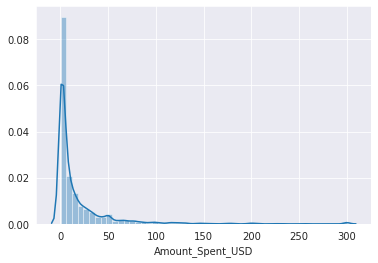

In [0]:
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(df2['Amount_Spent_USD'])

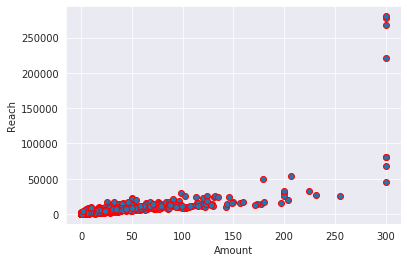

In [0]:
Amount_Spent_USD = df1['Amount_Spent_USD']
Reach = df1['Reach']
plt.scatter(Amount_Spent_USD, Reach, edgecolors='r')
plt.xlabel('Amount')
plt.ylabel('Reach')
plt.show()

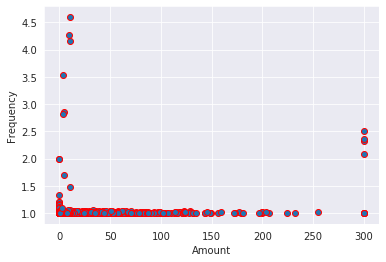

In [0]:
import matplotlib.pyplot as plt
Amount_Spent_USD = df1['Amount_Spent_USD']
Frequency = df1['Frequency']
plt.scatter(Amount_Spent_USD, Frequency, edgecolors='r')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

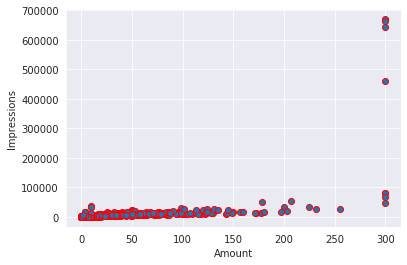

In [0]:
Amount_Spent_USD = df1['Amount_Spent_USD']
Impressions = df1['Impressions']
plt.scatter(Amount_Spent_USD, Impressions, edgecolors='r')
plt.xlabel('Amount')
plt.ylabel('Impressions')
plt.show()

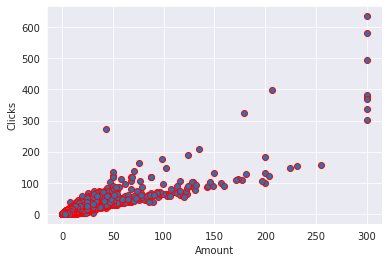

In [0]:
Amount_Spent_USD = df1['Amount_Spent_USD']
Clicks = df1['Clicks']
plt.scatter(Amount_Spent_USD, Clicks, edgecolors='r')
plt.xlabel('Amount')
plt.ylabel('Clicks')
plt.show()

Question 2

Build a multiple regression where the outcome variable is Amount Spent and the predictor variables are:Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks

In [0]:
df2.columns = df2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df2.head()

In [0]:
import statsmodels.api as sm
import numpy as np
from statsmodels.formula.api import ols

In [0]:
model = ols('amount_spent_usd ~ C(campaign_name) + reach + frequency + impressions + clicks + unique_clicks + page_likes + page_engagement + post_engagement + post_likes + post_comments + post_shares + photo_views + website_clicks', data=df2)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       amount_spent_usd   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     78.55
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:03:55   Log-Likelihood:                -6125.9
No. Observations:                1802   AIC:                         1.304e+04
Df Residuals:                    1408   BIC:                         1.521e+04
Df Model:                         393                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================================
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                          -8.6574      4.304     -2.012      0.044     -17.099      -0.215
C(campaign_name)[T.Cyber Weekend]                                                -199.5211     25.787     -7.737      0.000    -250.106    -148.936
C(campaign_name)[T.Nanigans_2_637]                                                  1.7933      5.582      0.321      0.748      -9.157      12.744
C(campaign_name)[T.Nanigans_2_638]                                                  2.6463      5.553      0.477      0.634      -8.246      13.539
C(campaign_name)[T.Nanigans_2_639]                                                  1.2084      5.555      0.218      0.828      -9.688      12.104
C(campaign_name)[T.Nanigans_2_640]                                                 -1.3903      5.038     -0.276      0.783     -11.272       8.492
C(campaign_name)[T.Nanigans_2_641]                                                 -1.1565      5.554     -0.208      0.835     -12.052       9.739
C(campaign_name)[T.Nanigans_2_642]                                                 -0.5348      5.556     -0.096      0.923     -11.433      10.363
C(campaign_name)[T.Nanigans_2_643]                                                  2.8410      6.482      0.438      0.661      -9.875      15.557
C(campaign_name)[T.Nanigans_2_644]                                                 -0.0904      8.696     -0.010      0.992     -17.149      16.969
C(campaign_name)[T.Nanigans_2_645]                                                 -4.0885      5.029     -0.813      0.416     -13.954       5.777
C(campaign_name)[T.Nanigans_2_646]                                                -12.3109      5.720     -2.152      0.032     -23.531      -1.091
C(campaign_name)[T.Nanigans_2_647]                                                -15.9054      5.708     -2.786      0.005     -27.103      -4.708
C(campaign_name)[T.Nanigans_2_648]                                                 -3.7020      6.531     -0.567      0.571     -16.514       9.110
C(campaign_name)[T.Nanigans_2_651]                                                 -2.6654      5.154     -0.517      0.605     -12.777       7.446
C(campaign_name)[T.Nanigans_2_652]                                                 -0.3115      5.027     -0.062      0.951     -10.172       9.549
C(campaign_name)[T.Nanigans_2_653]                                                 -1.6482      5.026     -0.328      0.743     -11.507       8.211
C(campaign_name)[T.Nanigans_2_654]                                                 -1.4005      5.562     -0.252      0.801

Question 3

Displaying the three predictors with the highest predictive value 

In [0]:
fitted_model.nlargest(3,'coef')

,coef,std err,t,P>|t|,[0.025,0.975]
C(campaign_name)[T.TravelPony: Conversion Test],56.1821,5.316,10.569,0.0,45.755,66.609
C(campaign_name)[T.Simple_Multi_Fill_Campaign_2_559],27.6599,3.998,6.918,0.0,19.816,35.503
C(campaign_name)[T.Simple_Multi_Fill_Campaign_2_601],22.5283,4.218,5.341,0.0,14.255,30.802
